In [1]:
# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
from Deliverable_5_2.LinearMPC.MPCVelControl import MPCVelControl

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
Ts = 0.05
sim_time = 15; H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# Static mass change and zero fuel rate
rocket.mass = 1.5
rocket.fuel_rate = 0.1
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(mpc, sim_time, H, x0, x_target=x_target, method='nonlinear')

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=ref[:,:-1], T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol); 


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Simulating time 0.00: Fuel left: 0.75 kg, 
Simulating time 0.05: Fuel left: 0.75 kg, 
Simulating time 0.10: Fuel left: 0.74 kg, 
Simulating time 0.15: Fuel left: 0.74 kg, 
Simulating time 0.20: Fuel left: 0.74 kg, 
Simulating time 0.25: Fuel left: 0.74 kg, 
Simulating time 0.30: Fuel left: 0.74 kg, 
Simulating time 0.35: Fuel left: 0.73 kg, 
Simulating time 0.40: Fuel left: 0.73 kg, 
Simulating time 0.45: Fuel left: 0.73 kg, 
Simulating time 0.50: Fuel left: 0.73 kg, 
Simulating time 0.55: Fuel left: 0.73 kg, 
Simulating time 0.60: Fuel left: 0.72 kg, 
Simulating time 0.65: Fuel left: 0.72 kg, 
Simulating 

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

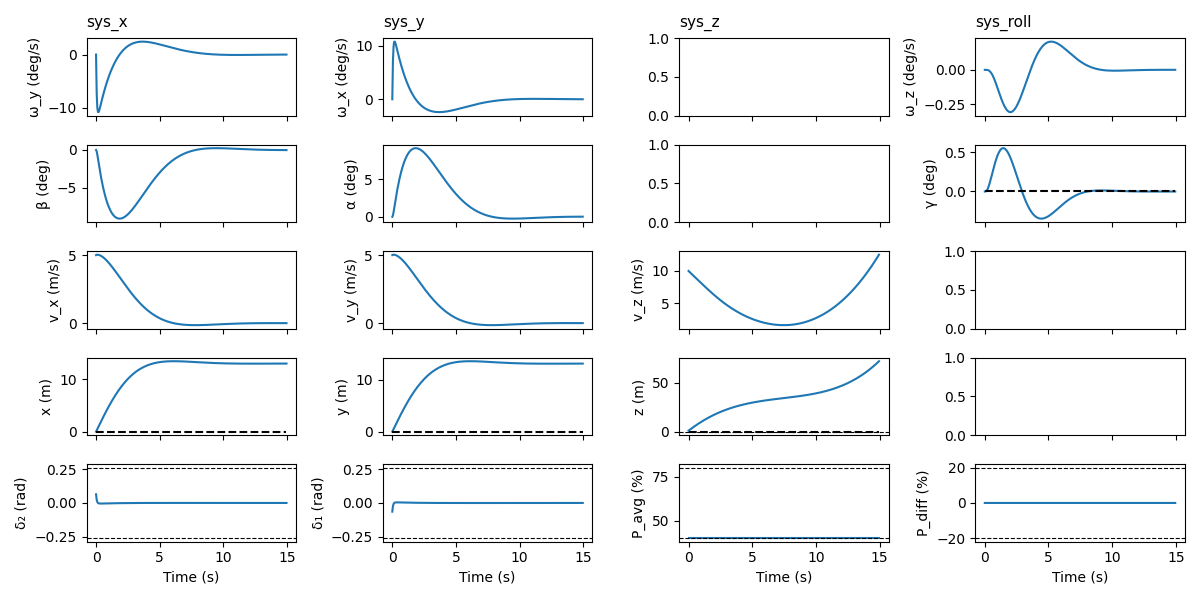

In [4]:
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, ref[:,:-1])

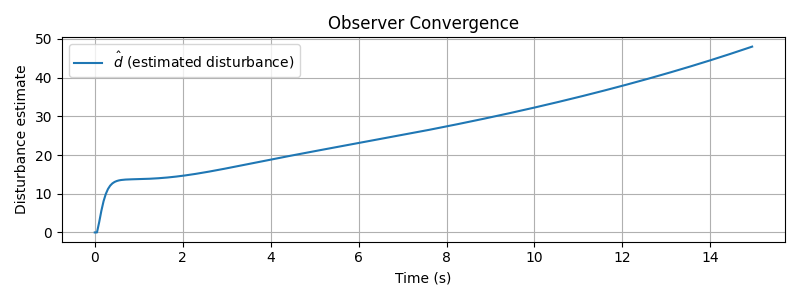

Final d_hat: 48.0112


In [5]:
# Check disturbance estimator convergence
import matplotlib.pyplot as plt

d_hat = np.array(mpc.mpc_z.d_hat_history)

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(t_cl[:-1], d_hat, label=r'$\hat{d}$ (estimated disturbance)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Disturbance estimate')
ax.set_title('Observer Convergence')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

print(f"Final d_hat: {d_hat[-1]:.4f}")


<>:29: SyntaxWarning: invalid escape sequence '\h'
<>:37: SyntaxWarning: invalid escape sequence '\h'
<>:29: SyntaxWarning: invalid escape sequence '\h'
<>:37: SyntaxWarning: invalid escape sequence '\h'
/var/folders/rv/lqbxht9d4fs4b3ns1s1rkdrc0000gn/T/ipykernel_60230/3410664921.py:29: SyntaxWarning: invalid escape sequence '\h'
  ax2.set_title('State Estimation Error: $v_z - \hat{v}_z$')
/var/folders/rv/lqbxht9d4fs4b3ns1s1rkdrc0000gn/T/ipykernel_60230/3410664921.py:37: SyntaxWarning: invalid escape sequence '\h'
  ax3.set_title('Disturbance Estimate $\hat{d}$ (thrust correction needed)')


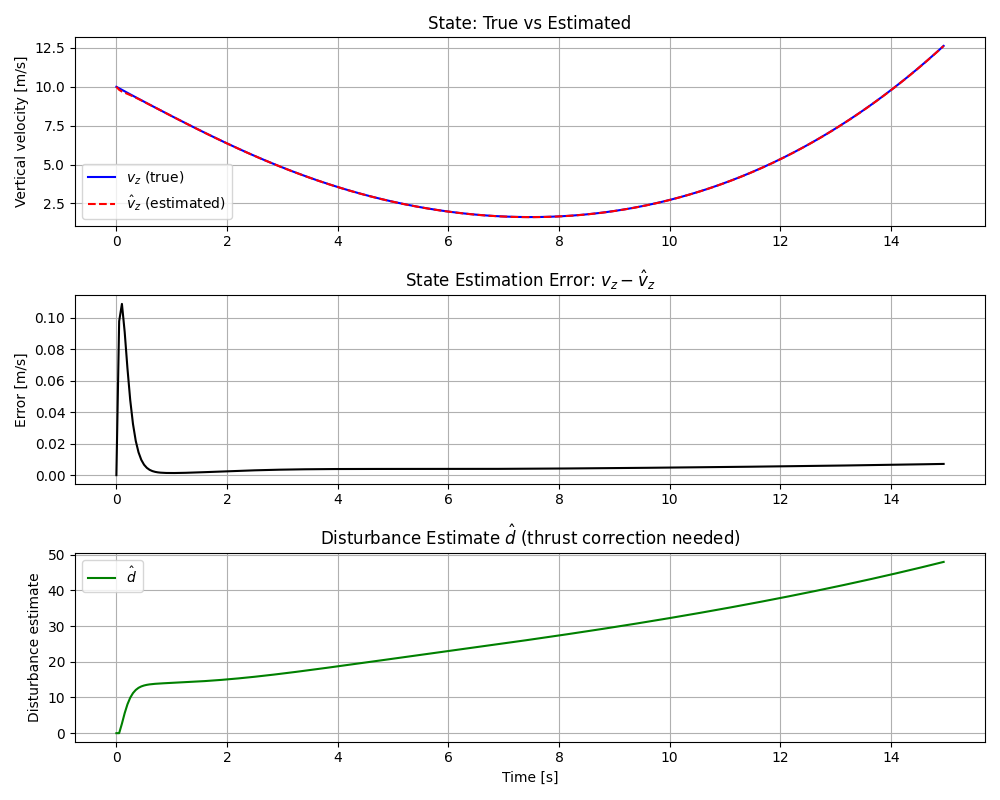

Final estimation error: 0.0071 m/s
Final d_hat: 48.01 N


In [7]:
import matplotlib.pyplot as plt

# Get logged estimates from the controller
x_hat_history = np.array(mpc.mpc_z.x_hat_history)  # Estimated vz
d_hat_history = np.array(mpc.mpc_z.d_hat_history)  # Estimated disturbance

# True vz is in x_cl (state index 8)
vz_true = x_cl[8, :-1]  # True vertical velocity

# Time vector (same length as estimates)
t = t_cl[:-1]

fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# 1. State estimation error
ax1 = axes[0]
ax1.plot(t, vz_true, 'b-', label=r'$v_z$ (true)')
ax1.plot(t, x_hat_history, 'r--', label=r'$\hat{v}_z$ (estimated)')
ax1.set_ylabel('Vertical velocity [m/s]')
ax1.set_title('State: True vs Estimated')
ax1.legend()
ax1.grid(True)

# 2. State estimation error
ax2 = axes[1]
estimation_error = vz_true - x_hat_history
ax2.plot(t, estimation_error, 'k-')
ax2.set_ylabel('Error [m/s]')
ax2.set_title('State Estimation Error: $v_z - \hat{v}_z$')
ax2.grid(True)

# 3. Disturbance estimate
ax3 = axes[2]
ax3.plot(t, d_hat_history, 'g-', label=r'$\hat{d}$')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Disturbance estimate')
ax3.set_title('Disturbance Estimate $\hat{d}$ (thrust correction needed)')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

# Print final values
print(f"Final estimation error: {estimation_error[-1]:.4f} m/s")
print(f"Final d_hat: {d_hat_history[-1]:.2f} N")

In [ ]:
# This cell creates a focused plot on the vertical velocity to clearly show the tracking offset.
import matplotlib.pyplot as plt

# --- Plotting Vertical Velocity Tracking to show offset ---
plt.style.use('default')
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# Plot vz (state 8)
ax.plot(t_cl[:-1], x_cl[8, :-1], 'b-', linewidth=2, label='Vertical Velocity (vz)')
# Plot reference for vz (which is 0)
ax.plot(t_cl[:-1], ref[8, :-1], 'k--', linewidth=2, label='Reference')

ax.set_title('Vertical Velocity Tracking with Mass Change (No Estimator)')
ax.set_ylabel('Vertical velocity vz [m/s]')
ax.set_xlabel('Time [s]')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# Calculate and print the final offset
# The state vector x_cl is one step longer than the reference vector, so we compare the final state to the final reference value
final_offset = x_cl[8, -2] - ref[8, -1]
print(f"Final tracking offset in vertical velocity: {final_offset:.4f} m/s")